# 영화에 대한 평점 변화(시각화)

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.error import HTTPError
from urllib.error import URLError

In [2]:
base_url = 'https://movie.naver.com/'
sub_url = 'movie/sdb/rank/rmovie.nhn?sel=cur&date=20170501'

try:
    html = urlopen(base_url+sub_url)
    
except HTTPError as he :
        print('http error')
except URLError as ue:
    print('url error')
else:
    soup= BeautifulSoup(html.read(),'html.parser')
    print(soup)


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20170501" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


 * 영화 제목 추출

In [3]:
soup.find_all('div', 'tit5')[0]

<div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=147092" title="히든 피겨스">히든 피겨스</a>
</div>

In [4]:
soup.find_all('div', 'tit5')[0].a

<a href="/movie/bi/mi/basic.nhn?code=147092" title="히든 피겨스">히든 피겨스</a>

In [5]:
# soup.find_all('div', 'tit5')[0].a.string
soup.find_all('div', 'tit5')[0].a.get_text()

'히든 피겨스'

* 영화 평점 추출

In [6]:
soup.find_all('td','point')

[<td class="point">9.38</td>,
 <td class="point">9.36</td>,
 <td class="point">9.29</td>,
 <td class="point">9.26</td>,
 <td class="point">9.25</td>,
 <td class="point">9.25</td>,
 <td class="point">9.24</td>,
 <td class="point">9.23</td>,
 <td class="point">9.22</td>,
 <td class="point">9.20</td>,
 <td class="point">9.18</td>,
 <td class="point">9.17</td>,
 <td class="point">9.14</td>,
 <td class="point">9.07</td>,
 <td class="point">9.07</td>,
 <td class="point">9.06</td>,
 <td class="point">9.04</td>,
 <td class="point">9.02</td>,
 <td class="point">8.92</td>,
 <td class="point">8.89</td>,
 <td class="point">8.89</td>,
 <td class="point">8.85</td>,
 <td class="point">8.81</td>,
 <td class="point">8.78</td>,
 <td class="point">8.78</td>,
 <td class="point">8.76</td>,
 <td class="point">8.75</td>,
 <td class="point">8.73</td>,
 <td class="point">8.73</td>,
 <td class="point">8.72</td>,
 <td class="point">8.70</td>,
 <td class="point">8.67</td>,
 <td class="point">8.66</td>,
 <td class

In [7]:
soup.find_all('td','point')[0].string

'9.38'

* dataframe 만들기

In [8]:
print('영화이름:', len(soup.find_all('div', 'tit5')))
print('평점:', len(soup.find_all('td','point')))

영화이름: 50
평점: 50


In [9]:
movie_names = [soup.find_all('div', 'tit5')[n].a.get_text()for n in range(0,50)]
print(len(movie_names))
print(movie_names)

50
['히든 피겨스', '사운드 오브 뮤직', '시네마 천국', '미스 슬로운', '잉여들의 히치하이킹', '나, 다니엘 블레이크', '바람과 함께 사라지다', '오즈의 마법사', '벤허', '흑집사 : 북 오브 더 아틀란틱', '우리들', '일 포스티노', '댄서', '라이언', '코알라', '로건', '더 플랜', '분노의 질주: 더 익스트림', '시카고', '10분', '해리가 샐리를 만났을 때', '미녀와 야수', '너의 이름은.', '그랑블루', '한공주', '연애담', '포켓몬 더 무비 XY&Z; 「볼케니온 : 기계왕국의 비밀」', '리틀 프린세스 소피아: 엘레나와 비밀의 아발로 왕국', '분노', '맨체스터 바이 더 씨', '행복 목욕탕', '스머프: 비밀의 숲', '부당거래', '파닥파닥', '아비정전', '패션 오브 크라이스트', '라라랜드', '뽀로로 극장판 슈퍼썰매 대모험', '족구왕', '가디언즈 오브 갤럭시', '자전거 탄 소년', '오두막', '성실한 나라의 앨리스', '원라인', '존 윅 - 리로드', '사일런스', '클로저', '임금님의 사건수첩', '문라이트', '로미오와 줄리엣']


In [10]:
rates = [soup.find_all('td','point')[n].string for n in range(0,50)]
print(len(rates))
print(rates)

50
['9.38', '9.36', '9.29', '9.26', '9.25', '9.25', '9.24', '9.23', '9.22', '9.20', '9.18', '9.17', '9.14', '9.07', '9.07', '9.06', '9.04', '9.02', '8.92', '8.89', '8.89', '8.85', '8.81', '8.78', '8.78', '8.76', '8.75', '8.73', '8.73', '8.72', '8.70', '8.67', '8.66', '8.65', '8.59', '8.59', '8.59', '8.56', '8.56', '8.56', '8.54', '8.48', '8.39', '8.29', '8.28', '8.26', '8.20', '8.17', '8.12', '8.10']


In [11]:
import pandas as pd
date = pd.date_range('2017-5-1',periods =100, freq='D')
date

DatetimeIndex(['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
               '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
               '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28',
               '2017-05-29', '2017-05-30', '2017-05-31', '2017-06-01',
               '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
               '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
               '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
      

In [12]:
import urllib
from tqdm import tqdm_notebook  # 루프를 사용할때 진행 상태 바를 보여주는 함수
import time

In [13]:
for n in tqdm_notebook(range(100)):
    time.sleep(0.5)

C:\Users\A\anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [14]:
for n in tqdm_notebook(range(2), desc='outer'):
    for y in tqdm_notebook(range(100), desc='inner'):
        time.sleep(0.5)

C:\Users\A\anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


C:\Users\A\anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [16]:
names_result =[]
points_result=[]
date_result=[]

base_url = 'https://movie.naver.com/'
sub_url = 'movie/sdb/rank/rmovie.nhn?sel=cur&date='

for day in tqdm_notebook(date):
    # print(day)
    html = base_url+sub_url+'{date}'
    response = urlopen(html.format(date=urllib.parse.quote(day.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, 'html.parser')
    end = len(soup.find_all('td','point'))
    names_result.extend([soup.find_all('div', 'tit5')[n].a.get_text() for n in range(0,end)])
    points_result.extend([soup.find_all('td','point')[n].string for n in range(0,end)])
    date_result.extend([day for n in range(0,end)])
    


C:\Users\A\anaconda3\lib\site-packages\ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [17]:
print(len(names_result))
print(len(points_result))
print(len(date_result))

4723
4723
4723


In [18]:
movieDF=pd.DataFrame({'date': date_result, 'name': names_result, 'point':points_result})
movieDF

,date,name,point
0,2017-05-01,히든 피겨스,9.38
1,2017-05-01,사운드 오브 뮤직,9.36
2,2017-05-01,시네마 천국,9.29
3,2017-05-01,미스 슬로운,9.26
4,2017-05-01,잉여들의 히치하이킹,9.25
...,...,...,...
4718,2017-08-08,송 투 송,6.88
4719,2017-08-08,그 후,6.58
4720,2017-08-08,박쥐,6.09
4721,2017-08-08,싸이보그지만 괜찮아,5.17


In [19]:
movieDF.tail()

,date,name,point
4718,2017-08-08,송 투 송,6.88
4719,2017-08-08,그 후,6.58
4720,2017-08-08,박쥐,6.09
4721,2017-08-08,싸이보그지만 괜찮아,5.17
4722,2017-08-08,군함도,5.02


In [20]:
movieDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4723 non-null   datetime64[ns]
 1   name    4723 non-null   object        
 2   point   4723 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 110.8+ KB


* .astype() 함수를 이용하여 컬럼의 타입을 변경할 수 있다.

In [21]:
movieDF['point']
type(movieDF['point'])

pandas.core.series.Series

In [22]:
movieDF['point']=movieDF['point'].astype(float)

In [23]:
movieDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4723 non-null   datetime64[ns]
 1   name    4723 non-null   object        
 2   point   4723 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 110.8+ KB


In [24]:
import numpy as np  # 시각화 기본 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline

- 내가 원하는 영화의 평점을 총점으로 확인하고 싶다면?
- 피봇 테이블을 이용할 수 있습니다.

In [25]:
movie_pivot = pd.pivot_table(movieDF, index=['name'], aggfunc=np.sum) # 그룹을 지을 열 index 에 입력
movie_pivot

,point
name,
10분,124.46
47 미터,149.23
500일의 썸머,75.51
7년-그들이 없는 언론,137.28
7번째 내가 죽던 날,407.48
...,...
행복 목욕탕,217.41
헤드윅,385.13
환상의 빛,32.08


- 결과에 대한 정렬이 필요할 경우 : .sort_values(by=, ascending=)

In [26]:
movie_pivot_sort = movie_pivot.sort_values(by='point', ascending=False)

In [27]:
movie_pivot_sort.head()

,point
name,
댄서,914.60
"서서평, 천천히 평온하게",889.64
오두막,861.65
라라랜드,858.89
너의 이름은.,738.42


In [28]:
temp = movieDF.query('name==["노무현입니다"]')
temp

,date,name,point
1162,2017-05-25,노무현입니다,9.20
1215,2017-05-26,노무현입니다,8.97
1255,2017-05-27,노무현입니다,9.04
1298,2017-05-28,노무현입니다,9.04
1340,2017-05-29,노무현입니다,9.05
...,...,...,...
4501,2017-08-04,노무현입니다,8.93
4549,2017-08-05,노무현입니다,8.93
4596,2017-08-06,노무현입니다,8.93
4642,2017-08-07,노무현입니다,8.93


- 시각화

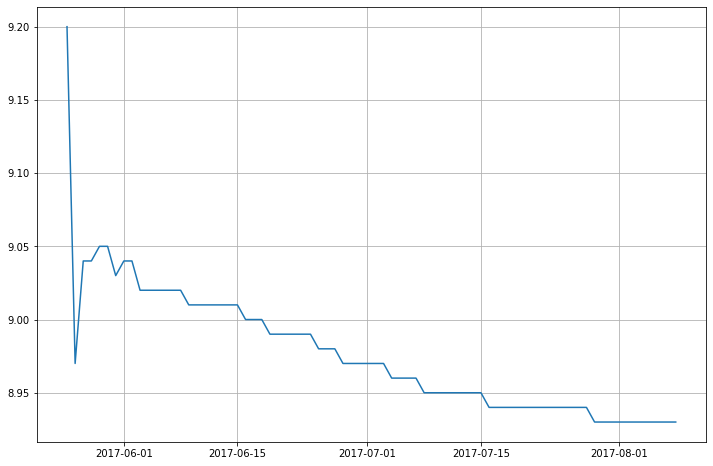

In [29]:
plt.figure(figsize=(12,8))
plt.plot(temp['date'], temp['point'])
plt.grid()
plt.show()

- 영화별 날짜 변화에 따른 평점 변화 시각화 실습

In [30]:
movie_date_point_pivot = pd.pivot_table(movieDF, index=['date'], columns=['name'], values=['point'])

In [31]:
movie_date_point_pivot

point                                                        \
name         10분 47 미터 500일의 썸머 7년-그들이 없는 언론 7번째 내가 죽던 날 7인의 사무라이 8 마일   
date                                                                     
2017-05-01  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-02  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-03  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-04  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-05  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
...          ...   ...      ...          ...         ...      ...  ...   
2017-08-04   NaN  7.40     8.39          NaN        7.84      NaN  NaN   
2017-08-05   NaN  7.40     8.39          NaN        7.84      NaN  NaN   
2017-08-06   NaN  7.39     8.39          NaN        7.84      NaN  NaN   
2017-08-07   NaN  7.39     8.39          NaN        7.84      NaN  NaN   
2017-08-08   NaN  7.38     8.39          NaN        7.85      NaN  NaN   

                                                ...                         \
name       가디언즈 오브 갤럭시 가디언즈 오브 갤럭시 VOL. 2 겟 아웃  ... 하울의 움직이는 성 하이큐!! 끝과 시작   
date                                            ...                          
2017-05-01        8.56                NaN  NaN  ...        NaN         NaN   
2017-05-02        8.56                NaN  NaN  ...        NaN         NaN   
2017-05-03         NaN               9.22  NaN  ...        NaN         NaN   
2017-05-04         NaN               9.15  NaN  ...        NaN         NaN   
2017-05-05         NaN               9.08  NaN  ...        NaN         NaN   
...                ...                ...  ...  ...        ...         ...   
2017-08-04         NaN                NaN  NaN  ...        NaN         NaN   
2017-08-05         NaN                NaN  NaN  ...        NaN         NaN   
2017-08-06         NaN                NaN  NaN  ...        NaN         NaN   
2017-08-07         NaN                NaN  NaN  ...        NaN         NaN   
2017-08-08         NaN                NaN  NaN  ...        NaN         NaN   

                                                                           \
name         한공주 해리가 샐리를 만났을 때 핵소 고지 행복 목욕탕   헤드윅 환상의 빛 흑집사 : 북 오브 더 아틀란틱   
date                                                                        
2017-05-01  8.78          8.89   NaN   8.70   NaN   NaN              9.20   
2017-05-02  8.78          8.89   NaN   8.68   NaN   NaN              9.21   
2017-05-03  8.78          8.89   NaN   8.70   NaN   NaN              9.22   
2017-05-04  8.78           NaN   NaN   8.67   NaN   NaN              9.23   
2017-05-05  8.78           NaN   NaN   8.69   NaN   NaN              9.24   
...          ...           ...   ...    ...   ...   ...               ...   
2017-08-04   NaN           NaN   NaN    NaN  9.18   NaN               NaN   
2017-08-05   NaN           NaN   NaN    NaN  9.18   NaN               NaN   
2017-08-06   NaN           NaN   NaN    NaN  9.18   NaN               NaN   
2017-08-07   NaN           NaN   NaN    NaN  9.18   NaN               NaN   
2017-08-08   NaN           NaN   NaN    NaN  9.18   NaN               NaN   

                   
name       히든 피겨스  
date               
2017-05-01   9.38  
2017-05-02   9.37  
2017-05-03   9.38  
2017-05-04   9.38  
2017-05-05   9.37  
...           ...  
2017-08-04    NaN  
2017-08-05    NaN  
2017-08-06    NaN  
2017-08-07    NaN  
2017-08-08    NaN  

[100 rows x 204 columns]

In [32]:
movie_date_point_pivot.head()

point                                                        \
name         10분 47 미터 500일의 썸머 7년-그들이 없는 언론 7번째 내가 죽던 날 7인의 사무라이 8 마일   
date                                                                     
2017-05-01  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-02  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-03  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-04  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-05  8.89   NaN      NaN          NaN         NaN      NaN  NaN   

                                                ...                         \
name       가디언즈 오브 갤럭시 가디언즈 오브 갤럭시 VOL. 2 겟 아웃  ... 하울의 움직이는 성 하이큐!! 끝과 시작   
date                                            ...                          
2017-05-01        8.56                NaN  NaN  ...        NaN         NaN   
2017-05-02        8.56                NaN  NaN  ...        NaN         NaN   
2017-05-03         NaN               9.22  NaN  ...        NaN         NaN   
2017-05-04         NaN               9.15  NaN  ...        NaN         NaN   
2017-05-05         NaN               9.08  NaN  ...        NaN         NaN   

                                                                                
name         한공주 해리가 샐리를 만났을 때 핵소 고지 행복 목욕탕 헤드윅 환상의 빛 흑집사 : 북 오브 더 아틀란틱 히든 피겨스  
date                                                                            
2017-05-01  8.78          8.89   NaN   8.70 NaN   NaN              9.20   9.38  
2017-05-02  8.78          8.89   NaN   8.68 NaN   NaN              9.21   9.37  
2017-05-03  8.78          8.89   NaN   8.70 NaN   NaN              9.22   9.38  
2017-05-04  8.78           NaN   NaN   8.67 NaN   NaN              9.23   9.38  
2017-05-05  8.78           NaN   NaN   8.69 NaN   NaN              9.24   9.37  

[5 rows x 204 columns]

In [ ]:
# movie_date_point_pivot.columns = movie_date_point_pivot.columns.droplevel()

In [ ]:
# movie_date_point_pivot.head()

In [33]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [34]:
target_col =['행복 목욕탕', '흑집사 : 북 오브 더 아틀란틱']
plt.figure(figsize=(12,8))
plt.plot(movie_date_point_pivot[target_col])
plt.legend(target_col, loc='best')
plt.grid()
plt.show()

KeyError: "['행복 목욕탕' '흑집사 : 북 오브 더 아틀란틱'] not in index"

<Figure size 864x576 with 0 Axes>